# **Boston house pricing**

## **Imports**

In [68]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
# %matplotlib
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

## **Dataset**

This data set is available [here](https://lib.stat.cmu.edu/datasets/boston). It needs a little it of cleaning in order to be suitable for work!

### **Loading the data**

In [2]:
boston = pd.read_csv('Boston_housing-source_data.csv')

#### **Some basic info about the dataset**

In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


#### **Feature correlation matrix**

In [7]:
corr_matrix = boston.corr()

In [8]:
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


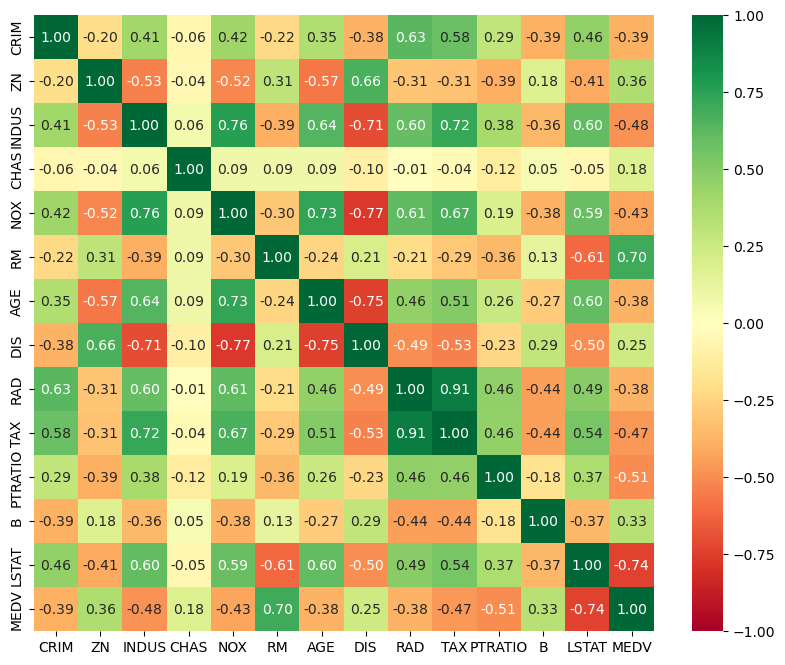

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(boston.corr(), annot=True, cbar=True, fmt='.2f', vmin = -1, cmap = 'RdYlGn')
plt.show()

In [10]:
corr_matrix.loc['MEDV', corr_matrix['MEDV'].abs() <= 0.2]

CHAS    0.17526
Name: MEDV, dtype: float64

**CHAS** feature doesn't correlate well with target variable. Experiments with and without it will be caried.

### **Splitting the data to a train and test set**

#### **With all columns**

In [11]:
X = boston.iloc[:, :-1]

In [12]:
y = boston.iloc[:, -1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [14]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
454,9.51363,0.0,18.10,0,0.7130,6.728,94.1,2.4961,24,666.0,20.2,6.68,18.71
471,4.03841,0.0,18.10,0,0.5320,6.229,90.7,3.0993,24,666.0,20.2,395.33,12.87
281,0.03705,20.0,3.33,0,0.4429,6.968,37.2,5.2447,5,216.0,14.9,392.23,4.59
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
107,0.13117,0.0,8.56,0,0.5200,6.127,85.2,2.1224,5,384.0,20.9,387.69,14.09


In [15]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
224,0.31533,0.0,6.20,0,0.504,8.266,78.3,2.8944,8,307.0,17.4,385.05,4.14
137,0.35233,0.0,21.89,0,0.624,6.454,98.4,1.8498,4,437.0,21.2,394.08,14.59
453,8.24809,0.0,18.10,0,0.713,7.393,99.3,2.4527,24,666.0,20.2,375.87,16.74
303,0.10000,34.0,6.09,0,0.433,6.982,17.7,5.4917,7,329.0,16.1,390.43,4.86
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315.0,16.4,392.89,6.57


#### **Filtering CHAS**

In [16]:
# y dataset is the same as the above
X_f = boston.drop(['CHAS', 'MEDV'], axis = 1)

In [17]:
X_f_train, X_f_test, y_train, y_test = train_test_split(X_f, y, test_size = 0.2, random_state = 3)

In [18]:
X_f_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
454,9.51363,0.0,18.10,0.7130,6.728,94.1,2.4961,24,666.0,20.2,6.68,18.71
471,4.03841,0.0,18.10,0.5320,6.229,90.7,3.0993,24,666.0,20.2,395.33,12.87
281,0.03705,20.0,3.33,0.4429,6.968,37.2,5.2447,5,216.0,14.9,392.23,4.59
477,15.02340,0.0,18.10,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
107,0.13117,0.0,8.56,0.5200,6.127,85.2,2.1224,5,384.0,20.9,387.69,14.09


#### **Normalizing data**

Ranges of the values of the different features in the dataset are diverse. Because of that dataset from previous section (**Filtering CHAS**) will be normalized.

In [19]:
minmax = MinMaxScaler()

In [20]:
minmax.fit(X_f_train)

MinMaxScaler()

In [21]:
X_fn_train = minmax.transform(X_f_train)

In [22]:
X_fn_test = minmax.transform(X_f_test)

## **Helper functions**

In [23]:
def get_metrics(y_true, y_pred):
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = metrics.root_mean_squared_error(y_true, y_pred)
    huber = tf.keras.metrics.huber(y_true, y_pred).numpy()
    r2 = metrics.r2_score(y_true, y_pred)
    result_l = [mae, mse, rmse, huber, r2]
    result_d = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'Huber': huber, 'R2': r2}
    result_s = print_metrics(result_d)
    return result_l, result_d, result_s

In [24]:
def print_metrics(metrics):
    s = '; '.join([f'{key}: {value:.4f}' for (key, value) in metrics.items()])
    return s

In [25]:
def get_predictions_plots(y_true, y_pred):
    plt.figure(figsize = (6, 6))
    plt.scatter(x = y_true, y = y_pred)
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.show()

In [26]:
def get_history_plot(history):
    plt.figure(figsize = (8, 6))
    for key in history.keys():
        plt.plot(history[key], label = key)
    plt.legend()
    plt.show()

In [27]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor = 'loss',
    patience = 5
)

## **Modeling**

### **Linear regression**

##### **Full data**

In [28]:
lr_model = LinearRegression()

In [29]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_lr_pred = lr_model.predict(X_test)

In [69]:
l_lr, d_lr, s_lr = get_metrics(y_test, y_lr_pred)

In [32]:
print(s_lr)

MAE: 3.0143; MSE: 16.9431; RMSE: 4.1162; Huber: 2.5481; R2: 0.7953


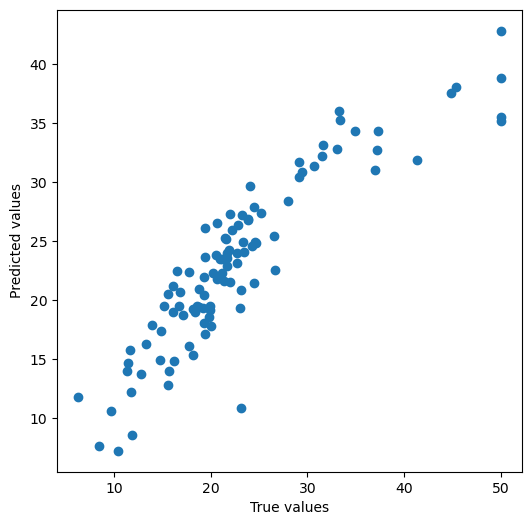

In [33]:
get_predictions_plots(y_test, y_lr_pred)

##### **Filtered data**

In [34]:
lr_f_model = LinearRegression()

In [35]:
lr_f_model.fit(X_f_train, y_train)

LinearRegression()

In [36]:
y_lr_f_pred = lr_f_model.predict(X_f_test)

In [37]:
l_lr_f, d_lr_f, s_lr_f = get_metrics(y_test, y_lr_f_pred)

In [38]:
print(s_lr_f)

MAE: 3.0648; MSE: 16.2226; RMSE: 4.0277; Huber: 2.5915; R2: 0.8040


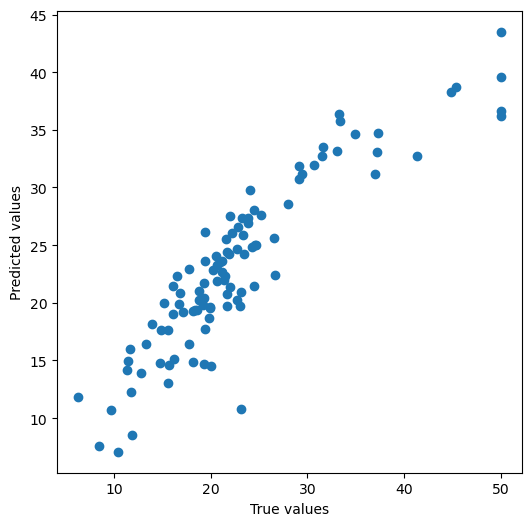

In [39]:
get_predictions_plots(y_test, y_lr_f_pred)

##### **Filtered normalized data**

In [40]:
lr_fn_model = LinearRegression()

In [41]:
lr_fn_model.fit(X_fn_train, y_train)

LinearRegression()

In [42]:
y_lr_fn_pred = lr_fn_model.predict(X_fn_test)

In [43]:
l_lr_fn, d_lr_fn, s_lr_fn = get_metrics(y_test, y_lr_fn_pred)

In [44]:
print(s_lr_fn)

MAE: 3.0648; MSE: 16.2226; RMSE: 4.0277; Huber: 2.5915; R2: 0.8040


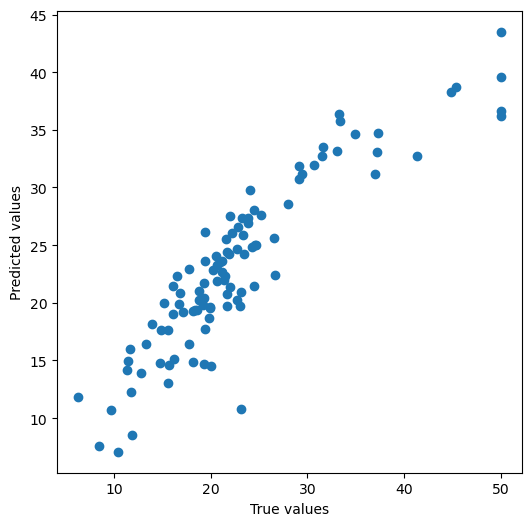

In [45]:
get_predictions_plots(y_test, y_lr_fn_pred)

### **Neural network**

##### **Full data**

This is the initial configuration of the neureal netowrk:

In [46]:
tf.keras.utils.set_random_seed(42)

model_nn_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model_nn_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae']
)

model_nn_1_history = model_nn_1.fit(
    x = X_train,
    y = y_train,
    batch_size = 20,
    epochs = 100,
    # callbacks = [early_stop]
)

Epoch 1/100


I0000 00:00:1721216797.906920   12546 service.cc:145] XLA service 0x7f157401d750 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721216797.906997   12546 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-07-17 13:46:37.920442: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-17 13:46:37.996748: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 1/21 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - loss: 17.4006 - mae: 17.4006

I0000 00:00:1721216798.814982   12546 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 21.5143 - mae: 21.5143
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 8.3889 - mae: 8.3889
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 5.6256 - mae: 5.6256
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 5.4455 - mae: 5.4455
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 5.9062 - mae: 5.9062
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 5.7752 - mae: 5.7752
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 5.1198 - mae: 5.1198
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 4.9225 - mae: 4.9225
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 4.8677 - mae: 4.8677
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 4.9688 - mae: 4.9688
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 5.0058 - mae: 5.0058
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.3057 - mae: 5.3057 
Epoch 13/100
21/21 ━━━━━━

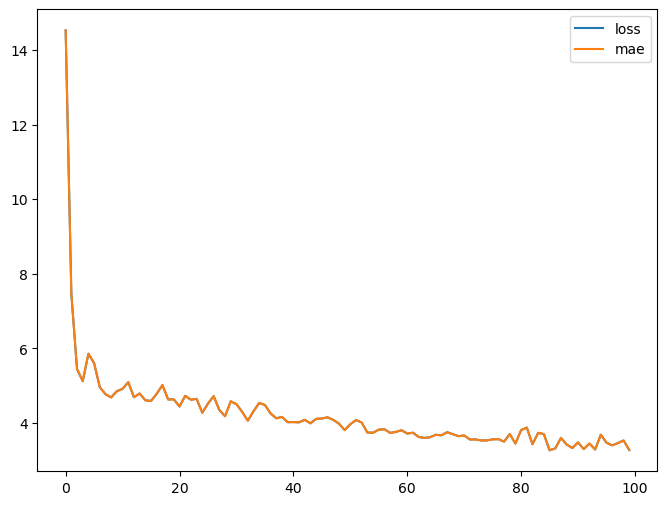

In [47]:
get_history_plot(model_nn_1_history.history)

In [48]:
model_nn_1.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.2921 - mae: 3.2921


[3.1822078227996826, 3.1822078227996826]

In [49]:
y_nn_1_pred = model_nn_1.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [50]:
l_nn_1, d_nn_1, s_nn_1 = get_metrics(y_test, tf.squeeze(y_nn_1_pred))

In [51]:
print(s_nn_1)

MAE: 3.1822; MSE: 29.5729; RMSE: 5.4381; Huber: 2.7447; R2: 0.6426


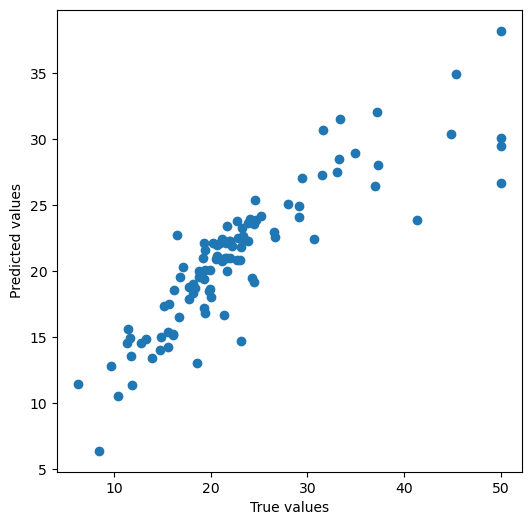

In [52]:
get_predictions_plots(y_test, y_nn_1_pred)

##### **Filtered data**

In [53]:
tf.keras.utils.set_random_seed(42)

model_nn_1_f = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model_nn_1_f.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae']
)

model_nn_1_f_history = model_nn_1_f.fit(
    x = X_f_train,
    y = y_train,
    batch_size = 20,
    epochs = 100,
    # callbacks = [early_stop]
)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 20.9959 - mae: 20.9959
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3466 - mae: 7.3466 
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3978 - mae: 6.3978 
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 5.8502 - mae: 5.8502
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2652 - mae: 5.2652 
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 5.1502 - mae: 5.1502
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 5.5308 - mae: 5.5308
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9995 - mae: 4.9995 
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 5.2358 - mae: 5.2358
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 5.0732 - mae: 5.0732
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 5.2841 - mae: 5.2841
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.3053 - mae: 5.3053 
Epoch 13/100
21/2

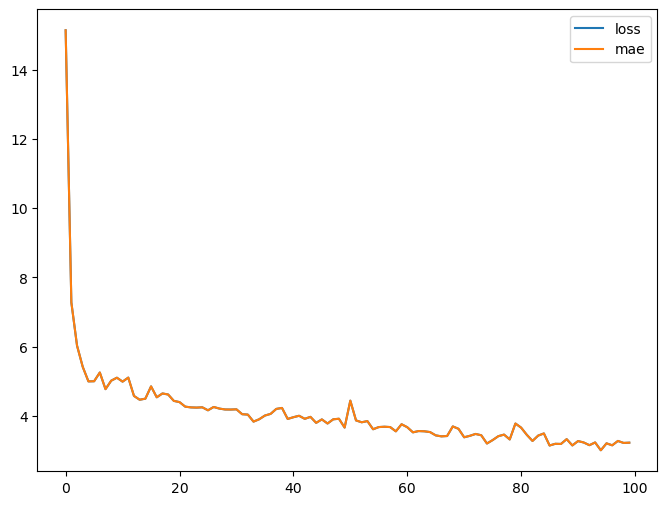

In [54]:
get_history_plot(model_nn_1_f_history.history)

In [55]:
model_nn_1_f.evaluate(X_f_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.7386 - mae: 2.7386


[2.6987054347991943, 2.6987054347991943]

In [56]:
y_nn_1_f_pred = model_nn_1_f.predict(X_f_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [57]:
l_nn_1_f, d_nn_1_f, s_nn_1_f = get_metrics(y_test, tf.squeeze(y_nn_1_f_pred))

In [58]:
print(s_nn_1_f)

MAE: 2.6987; MSE: 16.5472; RMSE: 4.0678; Huber: 2.2508; R2: 0.8000


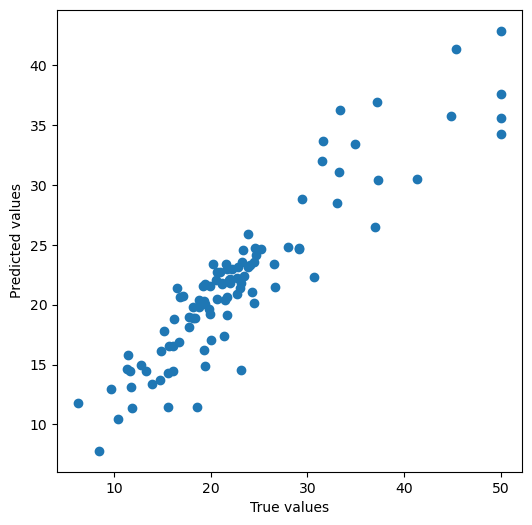

In [59]:
get_predictions_plots(y_test, y_nn_1_f_pred)

##### **Filtered normalized data**

In [76]:
tf.keras.utils.set_random_seed(42)

model_nn_1_fn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model_nn_1_fn.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae']
)

model_nn_1_fn_history = model_nn_1_fn.fit(
    x = X_fn_train,
    y = y_train,
    batch_size = 20,
    epochs = 100,
    # callbacks = [early_stop]
)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 19.5576 - mae: 19.5576
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1146 - mae: 9.1146 
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1071 - mae: 6.1071 
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3304 - mae: 5.3304 
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9458 - mae: 4.9458 
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4594 - mae: 4.4594 
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0095 - mae: 4.0095 
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6780 - mae: 3.6780 
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.3738 - mae: 3.3738 
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2556 - mae: 3.2556 
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2687 - mae: 3.2687 
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2204 - mae: 3.2204 
Epoch 13/100
21/21 ━━━━

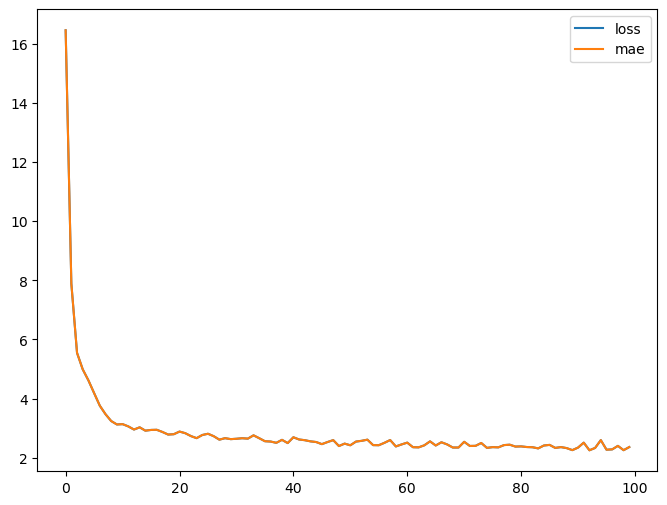

In [77]:
get_history_plot(model_nn_1_fn_history.history);

In [78]:
model_nn_1_fn.evaluate(X_fn_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.9981 - mae: 1.9981 


[2.0062873363494873, 2.0062873363494873]

In [79]:
y_nn_1_fn_pred = model_nn_1_fn.predict(X_fn_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [80]:
l_nn_1_fn, d_nn_1_fn, s_nn_1_fn = get_metrics(y_test, tf.squeeze(y_nn_1_fn_pred))

In [81]:
print(s_nn_1_fn)

MAE: 2.0063; MSE: 8.2624; RMSE: 2.8744; Huber: 1.5849; R2: 0.9002


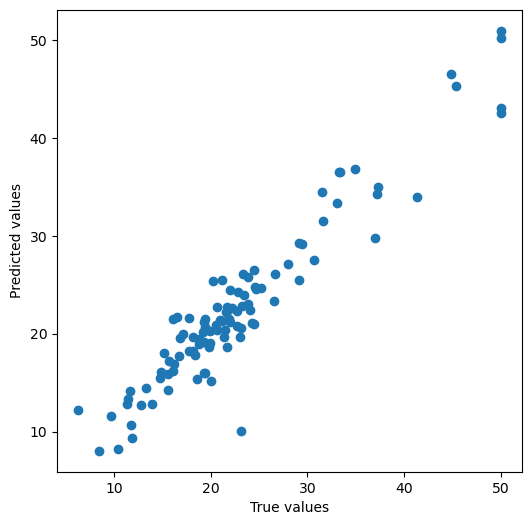

In [82]:
get_predictions_plots(y_test, y_nn_1_fn_pred)

##### **Filtered normalized data with model tuning**

In [70]:
tf.keras.utils.set_random_seed(42)

model_nn_2_fn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model_nn_2_fn.compile(
    # loss = tf.keras.losses.mae,
    loss = tf.keras.losses.huber, # Using huber as loss function gives better results
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    # optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.01),
    metrics = ['mae']
)

model_nn_2_fn_history = model_nn_2_fn.fit(
    x = X_fn_train,
    y = y_train,
    # batch_size = 20,
    batch_size = 24,
    epochs = 100,
    # validation_split = 0.2,
    # callbacks = [early_stop]
)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 19.8527 - mae: 20.3518
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3658 - mae: 9.8600 
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8990 - mae: 7.3909 
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3068 - mae: 5.7735 
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9006 - mae: 5.3799 
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4900 - mae: 4.9615 
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0940 - mae: 4.5677 
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6958 - mae: 4.1641 
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.3043 - mae: 3.7724 
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9529 - mae: 3.4156 
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7739 - mae: 3.2331 
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6688 - mae: 3.1194 
Epoch 13/100
17/17 ━━━━

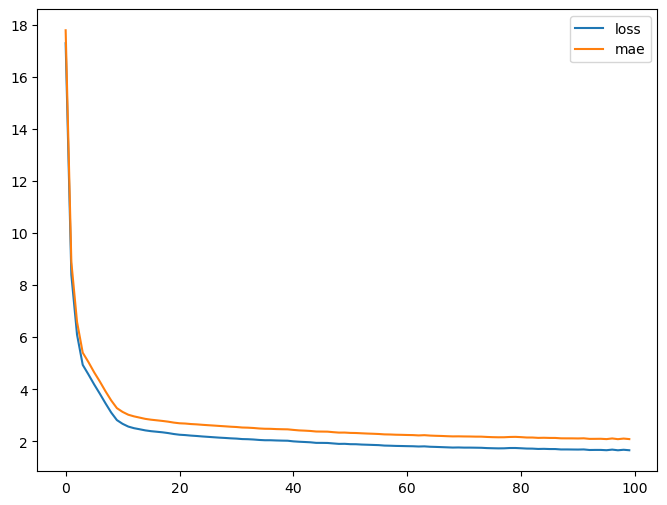

In [71]:
get_history_plot(model_nn_2_fn_history.history);

In [72]:
model_nn_2_fn.evaluate(X_fn_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.4856 - mae: 1.9031 


[1.506587028503418, 1.930292010307312]

In [73]:
y_nn_2_fn_pred = model_nn_2_fn.predict(X_fn_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [74]:
l_nn_2_fn, d_nn_2_fn, s_nn_2_fn = get_metrics(y_test, tf.squeeze(y_nn_2_fn_pred))

In [65]:
print(s_nn_1_fn)

MAE: 1.9303; MSE: 6.7094; RMSE: 2.5903; Huber: 1.5066; R2: 0.9189


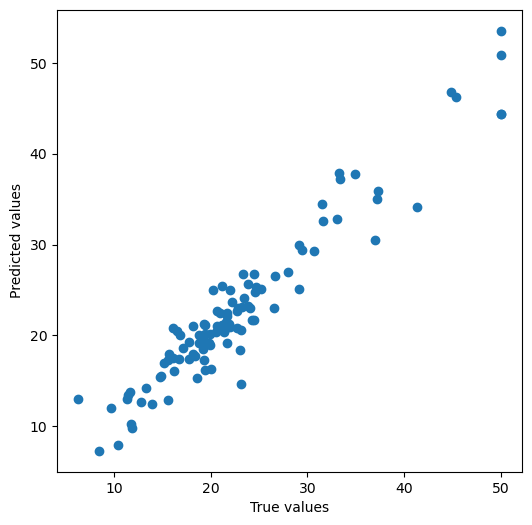

In [75]:
get_predictions_plots(y_test, y_nn_2_fn_pred)

## **Model comparison**

In [88]:
pd.DataFrame(
    data = [l_lr, l_lr_f, l_lr_fn, l_nn_1, l_nn_1_f, l_nn_1_fn, l_nn_2_fn],
    columns = ['MAE', 'MSE', 'RMSE', 'Huber', 'R2'],
    index = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7']
)

,MAE,MSE,RMSE,Huber,R2
Model 1,3.014250,16.943073,4.116196,2.548089,0.795262
Model 2,3.064776,16.222564,4.027724,2.591545,0.803968
Model 3,3.064776,16.222564,4.027724,2.591545,0.803968
Model 4,3.182208,29.572900,5.438097,2.744744,0.642644
Model 5,2.698705,16.547190,4.067824,2.250771,0.800046
Model 6,2.006287,8.262391,2.874438,1.584859,0.900158
Model 7,1.930292,6.709438,2.590258,1.506587,0.918924
